In [1]:
import os
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import cpi
import pymongo
from tqdm import tqdm
from scipy import stats
import math
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
db = myclient["imdb"]
imdb = db['imdb_cleaned']

In [3]:
num_movies = imdb.count_documents({})
num_movies

8181

In [4]:
months =    ['January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December']

month_dict = {}
budget_dict = {}
for month in months:
    month_dict[month] = []
    budget_dict[month] = []

for movie in imdb.find():
    rev = movie['cleaned_Revenue']
    month = movie['cleaned_month']
    month_dict[month].append(rev)
    budget_dict[month].append(movie['cleaned_Budget'])

In [16]:
num_month = []
for month in month_dict:
    print(month, len(month_dict[month]))
    num_month.append(len(month_dict[month]))

January 664
February 613
March 689
April 694
May 611
June 659
July 630
August 740
September 697
October 784
November 701
December 699


In [65]:
def plotBars(dct, isList = False):
    xrr = []
    yrr = []
    for key in dct:
        xrr.append(key)
        if(isList == True):
            yrr.append(len(dct[key]))
        else:
            yrr.append(dct[key])
    fig = go.Figure([go.Bar(x=xrr, y=yrr,marker_color='steelblue')])
    return fig

In [67]:
fig = plotBars(month_dict, isList=True)
fig.update_layout(
    # title="Plot Title",
    # xaxis_title="X Axis Title",
    yaxis_title="# released movies",
    legend_title="Legend Title",
)

fig.update_layout(
     margin=dict(l=10, r=10, t=10, b=10),
     # paper_bgcolor="LightSteelBlue",
)

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green",
)
fig.update_layout(font=dict(size=18))

fig.show()

In [19]:
avg_rev = {}
track = []
rev_arr = []
for key in month_dict:
    month_dict[key] = np.array(month_dict[key])
    avg_rev[key] = month_dict[key].mean()
    track.append((avg_rev[key], key))
    rev_arr.append(avg_rev[key])

In [64]:
fig = plotBars(avg_rev)
fig.update_layout(
    # title="Plot Title",
    # xaxis_title="X Axis Title",
    yaxis_title="Average Revenue per Month",
    legend_title="Legend Title",
)

fig.update_layout(
     margin=dict(l=10, r=10, t=10, b=10),
     # paper_bgcolor="LightSteelBlue",
)

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green",
)
fig.update_layout(font=dict(size=18))

fig.show()

In [21]:
avg_bjt = {}
for key in budget_dict:
    avg_bjt[key] = np.array(budget_dict[key]).mean()

In [22]:
fig = plotBars(avg_bjt)
fig.show()

In [20]:
ks_2samp(month_dict['January'], month_dict['December'])

KstestResult(statistic=0.21148973576710275, pvalue=7.704947790898586e-14)

In [83]:
np.array(month_dict['December']).mean(), np.array(month_dict['January']).mean(), np.array(month_dict['December']).mean() - np.array(month_dict['January']).mean()

(163332990.71816882, 57402403.634036146, 105930587.08413267)

In [73]:
import random

arr = month_dict['December']
random.shuffle(arr)
middle = len(arr)//2
ks_2samp(arr[0:middle], arr[middle:len(arr)])

KstestResult(statistic=0.05966434711420385, pvalue=0.5270910475908899)

In [74]:
stat_matrix = {}
pvalue_matrix = {}

for ik in month_dict:
    stat_matrix[ik] = {}
    pvalue_matrix[ik] = {}
    for jk in month_dict:
        ks = ks_2samp(month_dict[ik], month_dict[jk])
        stat_matrix[ik][jk] = ks.statistic
        pvalue_matrix[ik][jk] = ks.pvalue
        if(jk == ik):
            break

In [75]:
stat_df = pd.DataFrame(stat_matrix)
stat_df

,January,February,March,April,May,June,July,August,September,October,November,December
January,0.0,0.068292,0.048011,0.079902,0.154231,0.223877,0.182124,0.081732,0.086204,0.060794,0.147159,0.211490
February,NaN,0.000000,0.081727,0.136046,0.134382,0.187743,0.158963,0.048673,0.140010,0.109388,0.109978,0.186745
March,NaN,NaN,0.000000,0.088965,0.115493,0.186988,0.154791,0.066750,0.099675,0.057690,0.100599,0.192068
April,NaN,NaN,NaN,0.000000,0.163242,0.256565,0.232775,0.103517,0.033069,0.057931,0.165782,0.265804
May,NaN,NaN,NaN,NaN,0.000000,0.127155,0.134448,0.137225,0.161095,0.149590,0.079139,0.171917
June,NaN,NaN,NaN,NaN,NaN,0.000000,0.055401,0.208451,0.250760,0.219066,0.097671,0.079459
July,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.168940,0.247888,0.202098,0.090447,0.048995
August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.115604,0.073545,0.121564,0.211621
September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.073445,0.174096,0.279752
October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.137533,0.235995


In [76]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
def plotMatrix(dct2D):
    # print(dct2D)
    arr2D = []
    for ik in dct2D:
        arr1D = []
        for jk in dct2D[ik]:
            arr1D.append(round(dct2D[ik][jk], 3))
        arr2D.append(arr1D)
    df_cm = pd.DataFrame(arr2D, index = list(dct2D.keys()),
                  columns = list(dct2D.keys()))
    plt.figure(figsize = (20,14))
    sn.heatmap(df_cm, annot=True)
    plt.show()

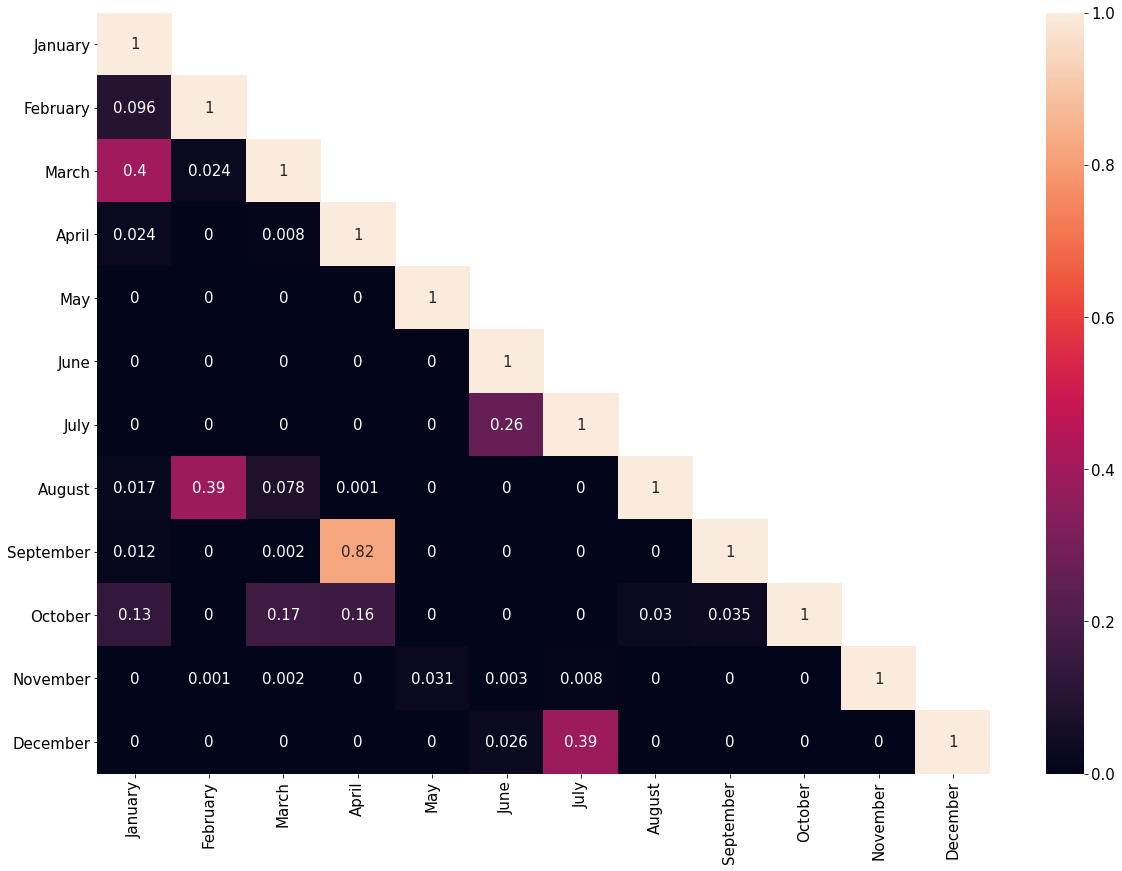

In [78]:
plt.rcParams.update({'font.size': 15})
plotMatrix(pvalue_matrix)

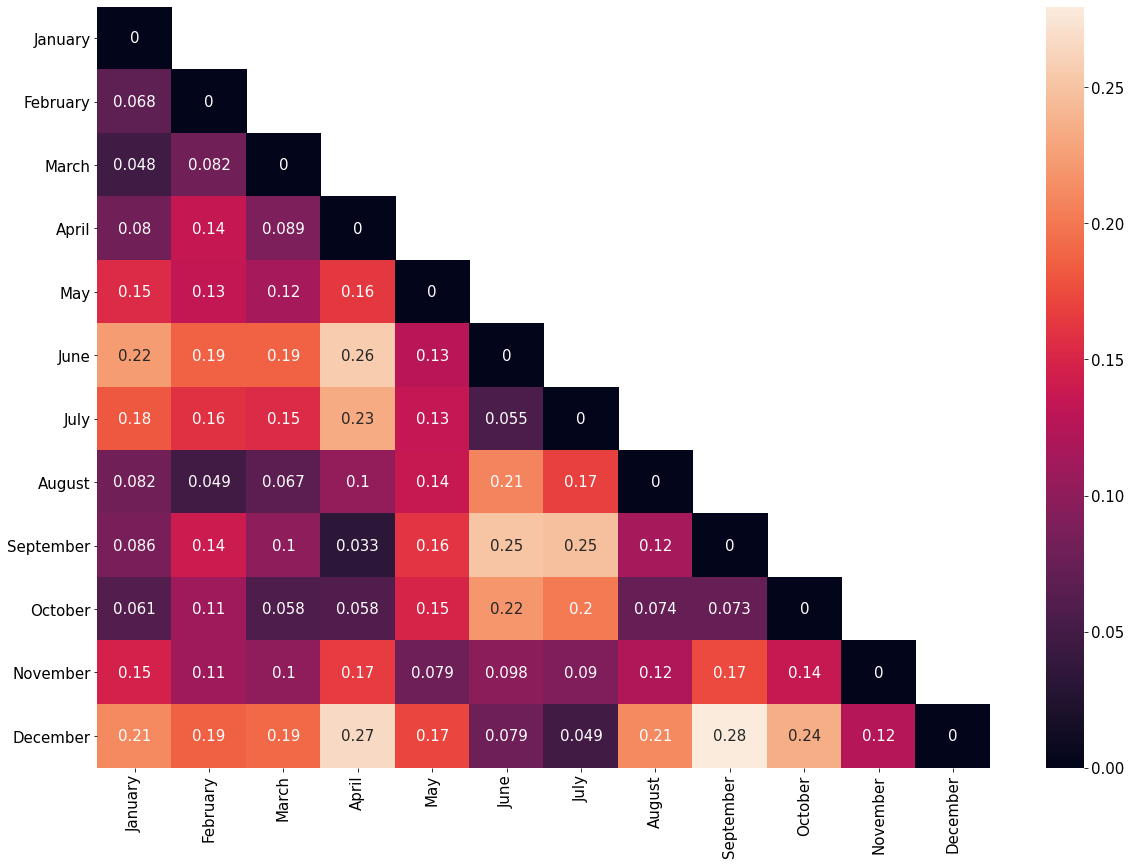

In [31]:
plt.rcParams.update({'font.size': 15})
plotMatrix(stat_matrix)

In [25]:
sorted_track = sorted(track)

In [31]:
month_track = {}
idx = 1
max_val = sorted_track[-1][0]
for tup in track:
    month_track[tup[1]] = (idx, tup[0])
    idx += 1

In [32]:
month_track

{'January': (1, 57402403.634036146),
 'February': (2, 74235592.49102773),
 'March': (3, 82181438.64876632),
 'April': (4, 59965216.39048991),
 'May': (5, 156523313.91325694),
 'June': (6, 170183081.491654),
 'July': (7, 152447106.1206349),
 'August': (8, 68545242.55675675),
 'September': (9, 49954451.7446198),
 'October': (10, 60086038.029336736),
 'November': (11, 130818934.29671897),
 'December': (12, 163332990.71816882)}